In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from pymonad.tools import curry
from math import sqrt,log
from functools import reduce
from statistics import mean,stdev

In [2]:
# importing reduce() from functools
from functools import reduce
def compose(*funcs):
    return reduce(lambda f,g : lambda x : f(g(x)), funcs, lambda x : x)

In [3]:
# patterns : [closure,class,object]
def class_sumstats(size = None) : # sumstats class (a factory)
    wsize = size if size == None else size + 1 
    sumstats = deque([(0.0,0.0,0.0)],wsize)
    def cardinality() :
        nonlocal sumstats
        return len(sumstats) - 1 
    def domain() :
        nonlocal sumstats
        return range(len(sumstats)-1)
    def push(y) :
        nonlocal sumstats,wsize
        last = sumstats[-1]
        sumstats.append((y,last[1] + y,last[2] + y*y))
        if len(sumstats) == sumstats.maxlen :
            y0,sy0,syy0 = sumstats[0]
            sumstats = deque([(y - y0,sy - sy0,syy - syy0) for y,sy,syy in sumstats],
                             wsize)
        return value,domain,cardinality,push
    def value(i) :
        return sumstats[i]
    return value,domain,cardinality,push

In [4]:
def class_normal_mean_segment_cost(sumstats) :
    ss_value,ss_domain,ss_cardinality = sumstats
    def cardinality() :
        nonlocal ss_cardinality
        n = ss_cardinality()
        return int(n*(n+1)/2)
    def value(a,b) :
        nonlocal ss_value
        _,sya,syya = ss_value(a)
        _,syb,syyb = ss_value(b+1)
        val = syb - sya
        val *= val
        val /= (b - a + 1)
        val = -val
        val += syyb - syya
        return val
    def domain() :
        nonlocal ss_domain
        outer = ss_domain()
        for a in outer :
            inner = ss_domain()
            for b in inner :
                if b >= a :
                    yield (a,b)
    return value,domain,cardinality
        

In [5]:
def class_right_cost(segment_cost) :
    sc_value,sc_domain,sc_cardinality = segment_cost
    def cardinality() :
        nonlocal sc_cardinality
        return int((sqrt(8*sc_cardinality()+1)-1)/2)
    def domain() :
        return range(cardinality())
    def value(i) :
        nonlocal sc_value
        return sc_value(i,cardinality()-1)
    return value,domain,cardinality

In [6]:
def class_left_cost(segment_cost) :
    sc_value,sc_domain,sc_cardinality = segment_cost
    def cardinality() :
        nonlocal sc_cardinality
        return int((sqrt(8*sc_cardinality()+1)-1)/2)
    def domain() :
        return range(cardinality())
    def value(i) :
        nonlocal sc_value
        return sc_value(0,i)
    return value,domain,cardinality

In [7]:
def class_left_right_cost(left_cost,right_cost) :
    l_value,_,_ = left_cost
    r_value,domain,cardinality = right_cost
    def value(i) :
        nonlocal l_value,r_value
        res = r_value(i)
        if i == 0 :
            return res
        return l_value(i-1) + res
    return value,domain,cardinality

In [8]:
def class_summed_cost(segment_cost) :
    sc_value,sc_domain,sc_cardinality = segment_cost
    def cardinality() :
        nonlocal sc_cardinality
        return int((sqrt(8*sc_cardinality()+1)-1)/2)
    def domain() :
        return range(cardinality())
    def value(i) :
        nonlocal sc_value
        b = cardinality()-1
        res = sc_value(i,b)
        if i == 0 :
            return res
        return sc_value(0,i-1) + res
    return value,domain,cardinality

In [9]:
def split(cost) :
    value,domain,_ = cost
    vmin,loc = min([(value(i),i) for i in domain()])
    return (value(0) - vmin,loc)

In [10]:
@curry(3)
def scale(mu,sigma,x) :
    return (x - mu)/sigma

In [15]:
def class_ordered_function(ordered) :
    def cardinality() :
        nonlocal ordered
        return len(ordered)
    def domain() :
        return range(cardinality())
    def value(i) :
        nonlocal ordered
        return ordered[i]
    return value,domain,cardinality

In [11]:

np.random.seed(0)
Z = [float(z) for z in list(np.random.normal(0, 1, 1000)) + 
    list(np.random.normal(1, 1, 1000))] # +
    # list(np.random.normal(0, 1, 1000))]
trans = scale(mean(Z),stdev(Z))
value,domain,cardinality,push = class_sumstats(2000)
temp = class_normal_mean_segment_cost((value,domain,cardinality))
value,domain,cardinality = cost = class_left_right_cost(class_left_cost(temp),class_right_cost(temp))

history = list()
for z in Z : 
    push(trans(z))
    history.append(split(cost))

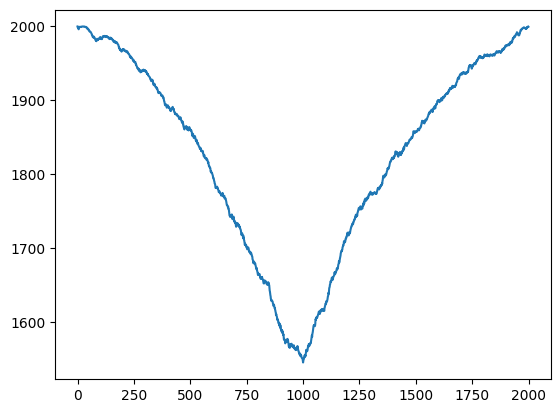

In [12]:
Y = [value(x) for x in domain()]
plt.plot(Y)

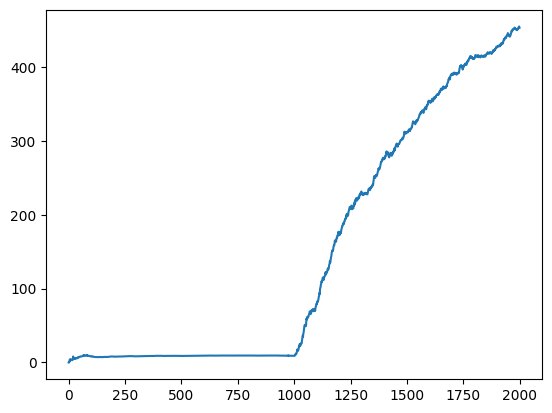

In [13]:
plt.plot([v for v,_ in history])

In [14]:
[i for v,i in history if v > 2*log(len(Z))]

[1000,
 1000,
 1000,
 1000,
 921,
 921,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 

In [21]:
F,domain_F,_ = class_ordered_function([v for v,_ in history])

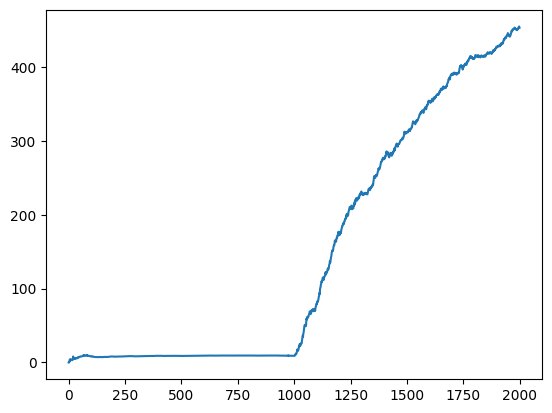

In [23]:
plt.plot([F(i) for i in domain_F()])